<a href="https://colab.research.google.com/github/20MAI0028/Deep-Learning-Assignments/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model
from random import randint

In [83]:
(x_train, _), (x_test, _)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [84]:
hidden_size = 100
latent_size = 20
input_layer = layers.Input(shape = x_train.shape[1:])
flattened = layers.Flatten()(input_layer)
hidden = layers.Dense(hidden_size, activation = 'relu')(flattened)
latent = layers.Dense(latent_size, activation = 'relu')(hidden)
encoder = Model(inputs = input_layer, outputs = latent, name = 'encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2020      
Total params: 80,520
Trainable params: 80,520
Non-trainable params: 0
_________________________________________________________________


In [85]:
input_layer_decoder = layers.Input(shape = encoder.output.shape)
upsampled = layers.Dense(hidden_size, activation = 'relu')(input_layer_decoder)
upsampled = layers.Dense(encoder.layers[1].output_shape[-1], activation = 'relu')(upsampled)
constructed = layers.Reshape(x_train.shape[1:])(upsampled)
decoder = Model(inputs = input_layer_decoder, outputs = constructed, name= 'decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, 20)]        0         
_________________________________________________________________
dense_2 (Dense)              (None, None, 100)         2100      
_________________________________________________________________
dense_3 (Dense)              (None, None, 784)         79184     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 81,284
Trainable params: 81,284
Non-trainable params: 0
_________________________________________________________________


In [86]:
autoencoder = Model(inputs = encoder.input, outputs = decoder(encoder.output))
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2020      
_________________________________________________________________
decoder (Functional)         (None, 28, 28)            81284     
Total params: 161,804
Trainable params: 161,804
Non-trainable params: 0
_________________________________________________________________


In [94]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=64, validation_data = (x_test, x_test))

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 1316.7280 - val_loss: 1301.9200
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 1305.5592 - val_loss: 1302.5616
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 1301.2199 - val_loss: 1286.8054
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 1299.2139 - val_loss: 1285.7972
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 1286.4397 - val_loss: 1281.9318
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 1284.3279 - val_loss: 1278.0873
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 1280.5877 - val_loss: 1268.1085
Epoch 8/10
938/938 [==============================] - 3s 4ms/step - loss: 1278.1103 - val_loss: 1275.0898
Epoch 9/10
938/938 [==============================] - 3s 4ms/step - loss: 1273.9159 - val_loss: 1266.5256
Epoch 10/10
938/938 [=========================

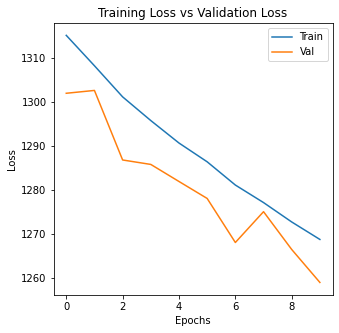

In [95]:
fig, axs = plt.subplots(figsize=(5,5))
axs.plot(history.history['loss'])
axs.plot(history.history['val_loss'])
axs.title.set_text('Training Loss vs Validation Loss')
axs.set_xlabel('Epochs')
axs.set_ylabel('Loss')
axs.legend(['Train','Val'])

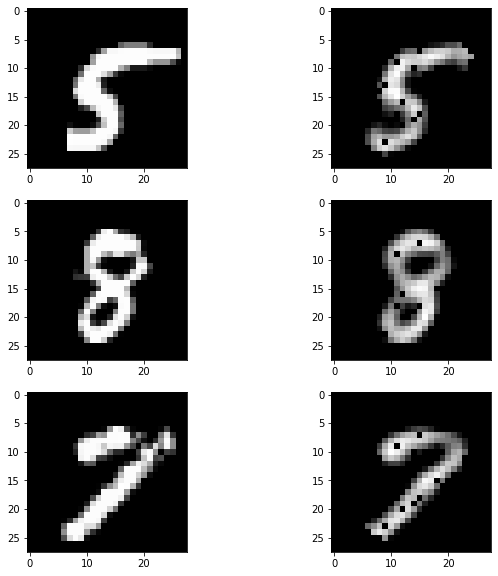

In [96]:
fig, axs = plt.subplots(3,2,figsize=(10,10))
for i in range(3):
  sample1 = x_train[randint(0,x_train.shape[0])]
  axs[i][0].imshow(sample1, cmap = 'gray')
  axs[i][1].imshow(autoencoder(np.expand_dims(sample1,0))[0], cmap = 'gray')